In [1]:

import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import cv2
from PIL import Image
import os
#from tqdm import tqdm
from keras.utils import to_categorical
from sklearn.model_selection import train_test_split

Using TensorFlow backend.


In [2]:
from keras.preprocessing.image import ImageDataGenerator

In [3]:
train_datagen = ImageDataGenerator(rescale = 1./255,
    shear_range = 0.2, # random application of shearing
    zoom_range = 0.2,
    horizontal_flip = True)

In [4]:
test_datagen = ImageDataGenerator(rescale = 1./255)
valid_datagen = ImageDataGenerator(rescale = 1./255)


In [5]:
train_generator = train_datagen.flow_from_directory(
    directory=r"./train/",
    target_size=(64, 64),
    color_mode="rgb",
    batch_size=32,
    class_mode="categorical",
    shuffle=True,
    seed=42)

Found 18475 images belonging to 140 classes.


In [6]:
test_generator = test_datagen.flow_from_directory(
    directory=r"./test/",
    target_size=(64, 64),
    color_mode="rgb",
    batch_size=1,
    class_mode="categorical",
    shuffle=False,
    seed=42
)

Found 700 images belonging to 140 classes.


In [7]:
valid_generator = valid_datagen.flow_from_directory(
    directory=r"./valid/",
    target_size=(64, 64),
    color_mode="rgb",
    batch_size=32,
    class_mode="categorical",
    shuffle=True,
    seed=42
)

Found 700 images belonging to 140 classes.


In [8]:
from keras.layers import Dense,Dropout,Flatten,Conv2D,MaxPool2D
from keras.models import Sequential

In [14]:
model=Sequential()
model.add(Conv2D(32,(5,5),input_shape=(64,64,3),activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(.2))

model.add(Conv2D(64,(3,3),activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(.2))

model.add(Conv2D(128,(3,3),activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(.2))

model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(.2))
model.add(Dense(128, activation='relu'))
model.add(Dropout(.2))

model.add(Dense(140, activation='softmax'))
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [15]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 60, 60, 32)        2432      
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 30, 30, 32)        0         
_________________________________________________________________
dropout_6 (Dropout)          (None, 30, 30, 32)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 28, 28, 64)        18496     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 14, 14, 64)        0         
_________________________________________________________________
dropout_7 (Dropout)          (None, 14, 14, 64)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 12, 12, 128)      

In [16]:
STEP_SIZE_TRAIN=train_generator.n//train_generator.batch_size
STEP_SIZE_VALID=valid_generator.n//valid_generator.batch_size

In [17]:
model.fit_generator(generator=train_generator,
                   steps_per_epoch=STEP_SIZE_TRAIN,
                   validation_data=valid_generator,
                   validation_steps=STEP_SIZE_VALID,
                   epochs=20,
                    verbose=1
                   )

Epoch 1/20
577/577 [==============================] - 82s 142ms/step - loss: 4.7429 - accuracy: 0.0267 - val_loss: 4.1880 - val_accuracy: 0.0670
Epoch 2/20
577/577 [==============================] - 80s 139ms/step - loss: 4.1158 - accuracy: 0.0912 - val_loss: 3.1892 - val_accuracy: 0.1722
Epoch 3/20
577/577 [==============================] - 82s 141ms/step - loss: 3.6372 - accuracy: 0.1673 - val_loss: 2.9286 - val_accuracy: 0.2665
Epoch 4/20
577/577 [==============================] - 82s 142ms/step - loss: 3.2583 - accuracy: 0.2296 - val_loss: 2.8047 - val_accuracy: 0.3338
Epoch 5/20
577/577 [==============================] - 82s 142ms/step - loss: 2.9920 - accuracy: 0.2837 - val_loss: 2.5974 - val_accuracy: 0.4386
Epoch 6/20
577/577 [==============================] - 79s 138ms/step - loss: 2.7801 - accuracy: 0.3210 - val_loss: 1.8636 - val_accuracy: 0.4820
Epoch 7/20
577/577 [==============================] - 79s 137ms/step - loss: 2.6361 - accuracy: 0.3526 - val_loss: 2.2729 - val_ac

In [20]:
model.save("Bird_species_Model")

In [18]:
df = pd.DataFrame(model.history.history)

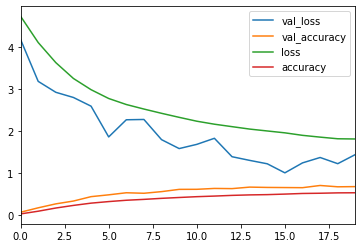

In [19]:
df.plot()

In [23]:
from keras.models import load_model
model = load_model("Bird_species_Model")

In [25]:
model

In [26]:
model.evaluate_generator(generator=valid_generator,steps=STEP_SIZE_VALID)

[1.1305413246154785, 0.6815476417541504]

In [27]:
STEP_SIZE_TEST=test_generator.n//test_generator.batch_size
test_generator.reset()
pred=model.predict_generator(test_generator,
steps=STEP_SIZE_TEST,
verbose=1)

700/700 [==============================] - 2s 2ms/step


In [28]:
predicted_class_indices=np.argmax(pred,axis=1)
labels = (train_generator.class_indices)
labels = dict((v,k) for k,v in labels.items())
predictions = [labels[k] for k in predicted_class_indices]

In [30]:
filenames=test_generator.filenames


In [32]:
results=pd.DataFrame({"Filename":filenames,
                      "Predictions":predictions})
results.to_csv("results.csv",index=False)


In [33]:
from sklearn.metrics import classification_report,confusion_matrix


In [ ]:
classification_report()